In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

ModuleNotFoundError: No module named 'peakutils'

In [2]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 388nm Graphs and Peak Difference

In [190]:
df = pd.read_csv('HD_5Angstroms_388nm.csv')
df = df.reset_index(drop = True)
df.columns=['ds','nA']

In [191]:
yhat=savitzky_golay(np.asarray(df.nA),50001,3)
df['yhat'] = yhat

In [192]:
dfx = df[(df.ds < 60) & (df.ds >10) ]

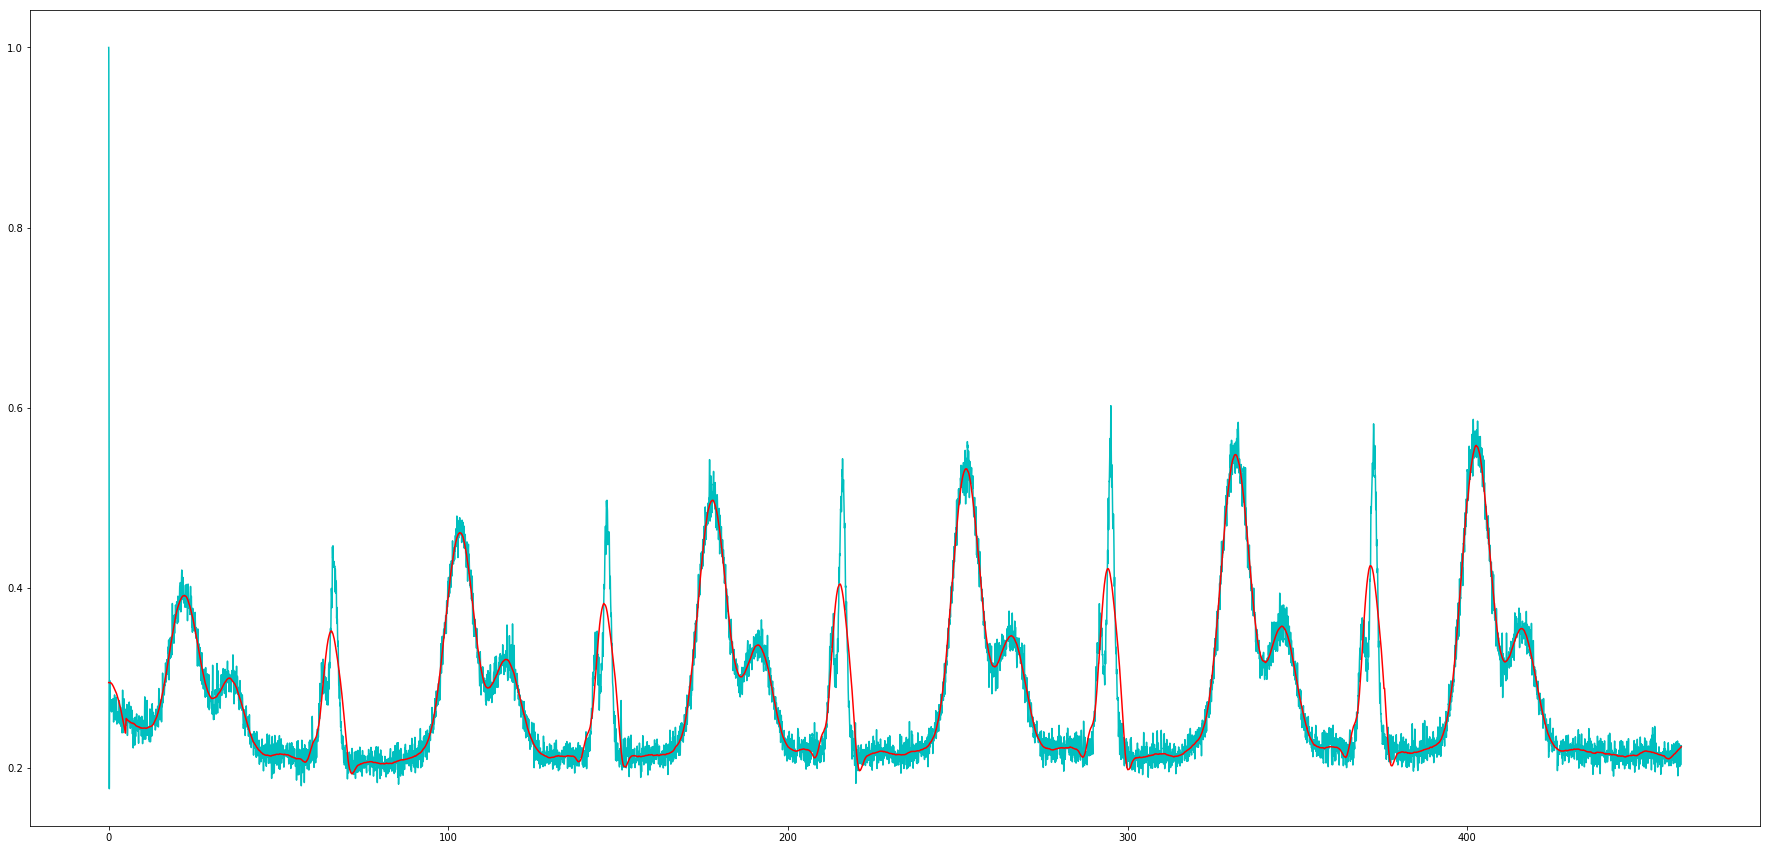

In [193]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

First Measurement

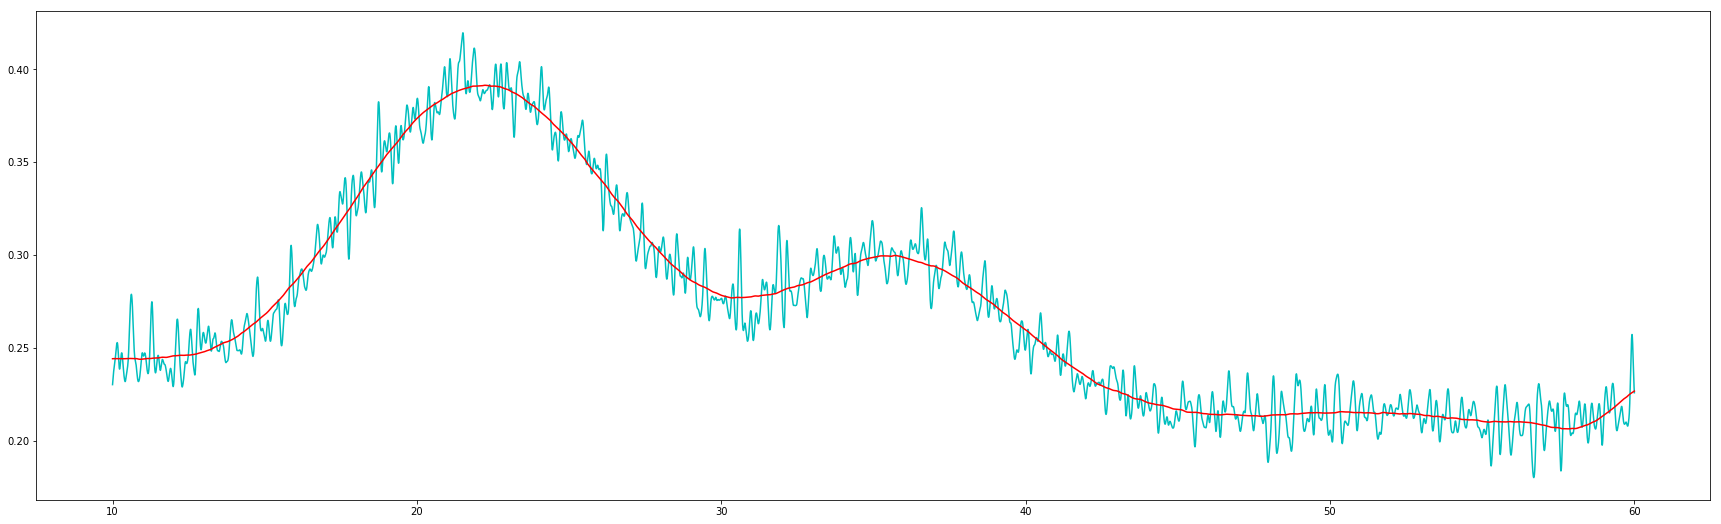

In [194]:
plt.figure(figsize=(30,9))
plt.plot(dfx.ds, dfx.nA, 'c')
plt.plot(dfx.ds, dfx.yhat, 'r')
plt.show()

Find indexes where there is a peak using peakutil package

In [195]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [196]:
print(indexes)

[    528  110459  177362  324992  512837  556851  581846  723433  882124
  924194  948354 1067458 1252018 1291262 1317105 1458024 1644083 1684914
 1711852 1841770 1994606 2042974 2061431]


Peak detector finds correct peaks at : 1,2,4,6,8,10,12,14,16,18,20,22

In [197]:
ind = 1,2,4,6,8,10,12,14,16,18,20,22

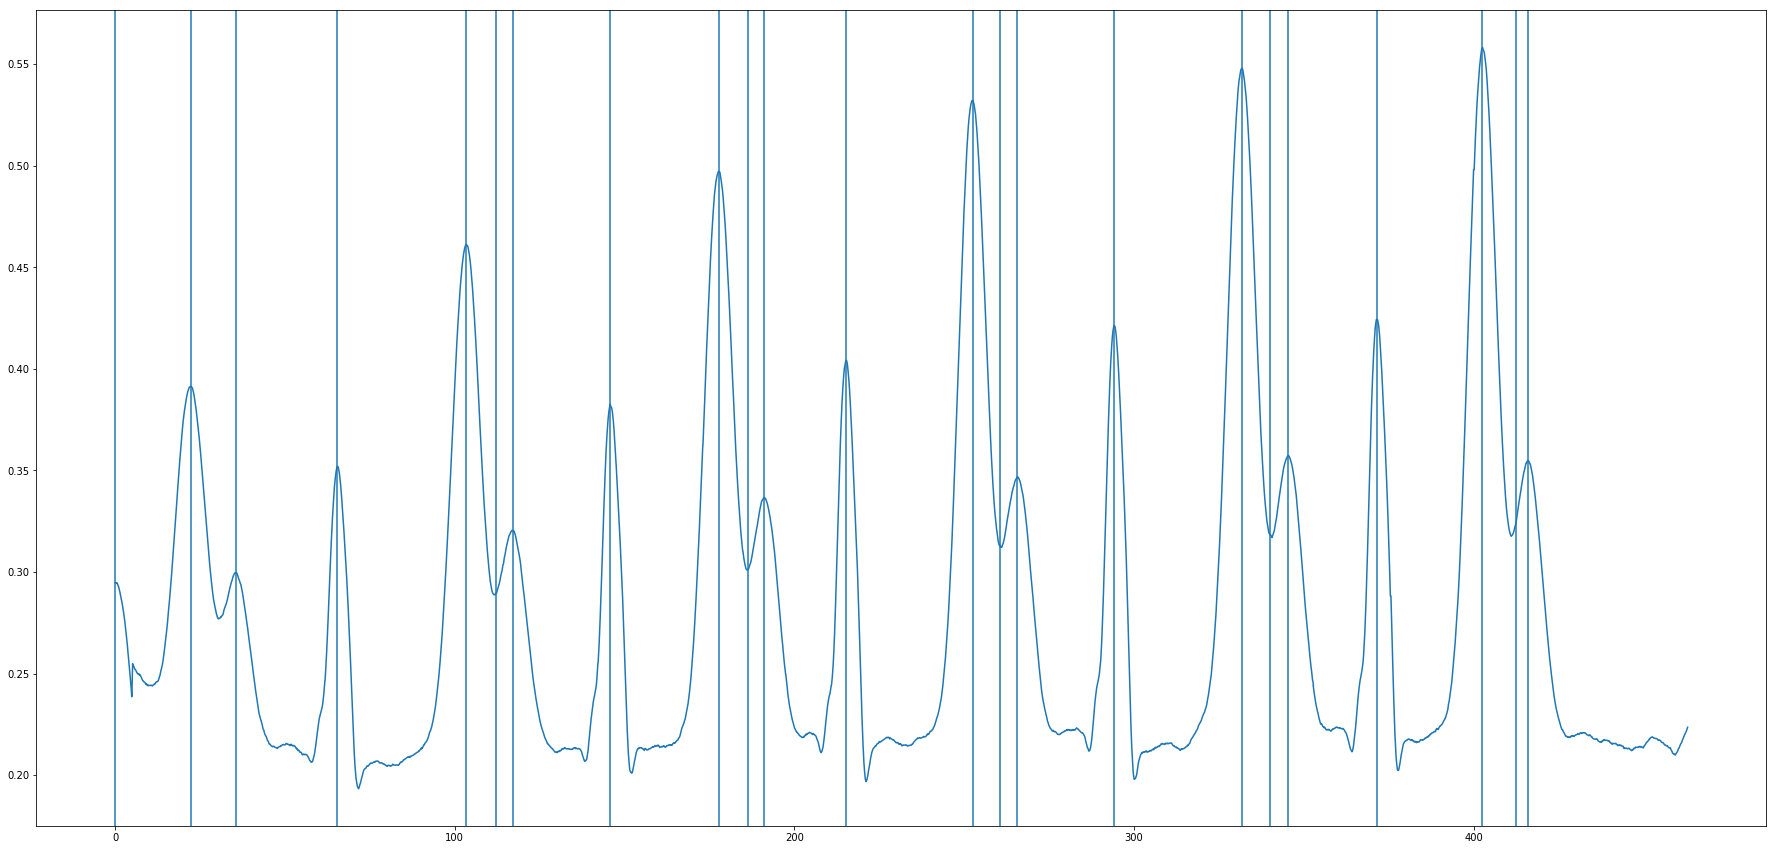

In [198]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax:
    plt.axvline(x=xc)
plt.show()

In [199]:
xmax_2 = [xmax[i] for i in ind]

Validation of correct peaks

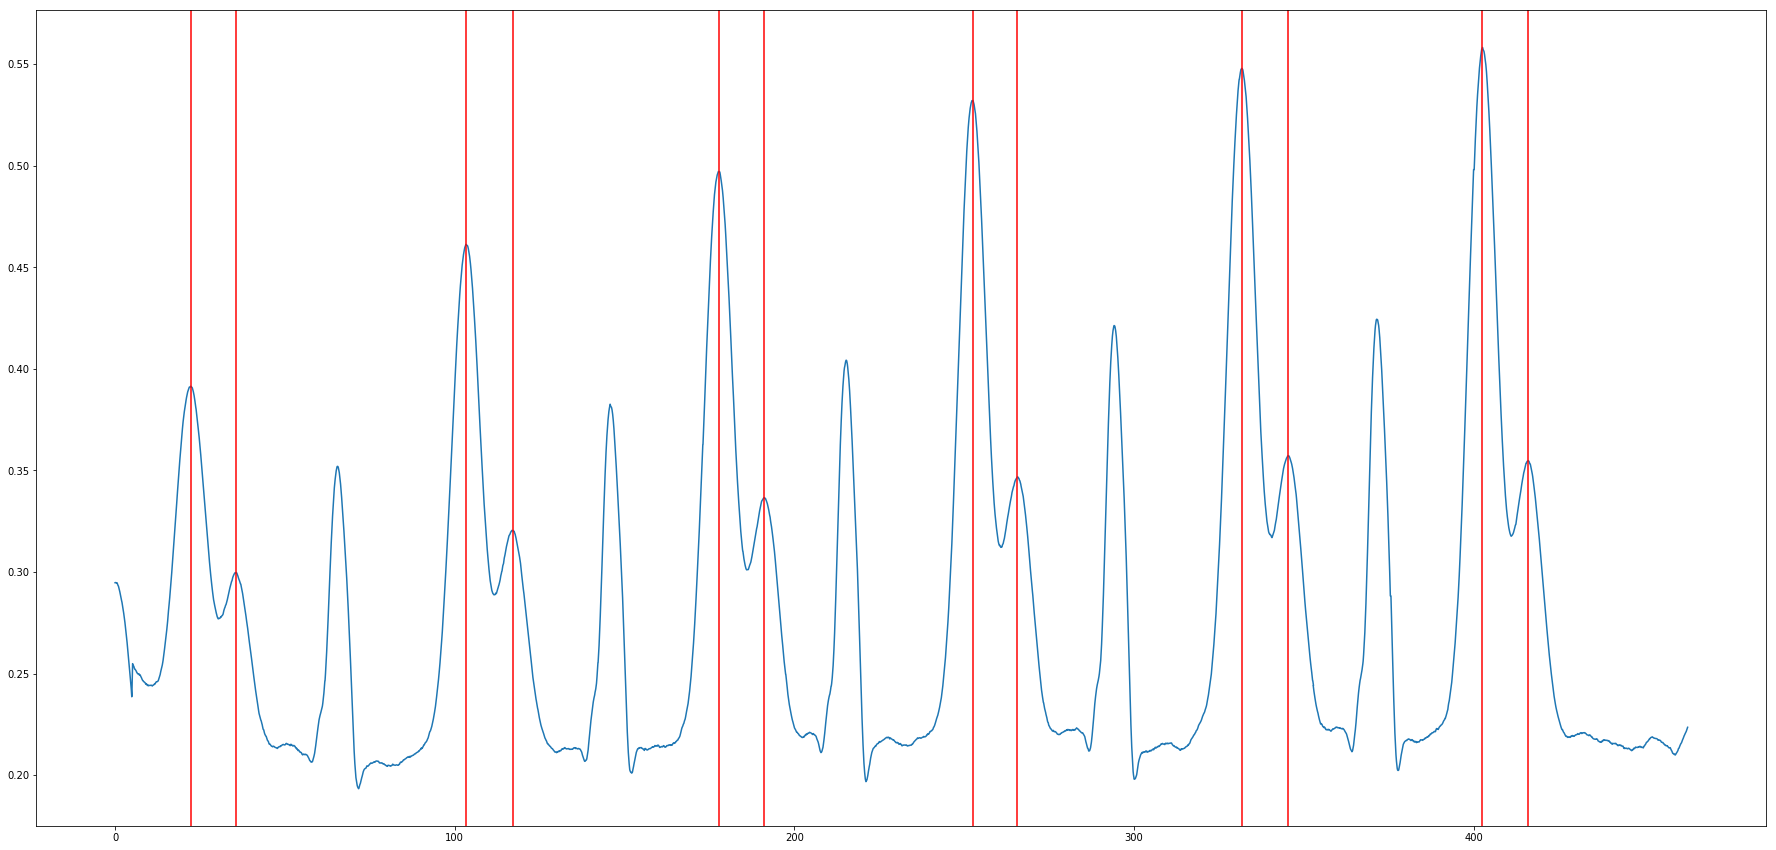

In [200]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [201]:
dfpeaks

,ds,nA,yhat
0,22.238348,0.387475,0.391471
1,35.707620,0.301344,0.299794
2,103.297780,0.473141,0.461295
3,117.190260,0.326246,0.320490
4,177.790780,0.499659,0.497171
5,191.173524,0.348064,0.336647
6,252.504356,0.528681,0.532130
7,265.656820,0.356947,0.346853
8,331.680324,0.533554,0.547915
9,345.325500,0.377375,0.357320


In [202]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax].reset_index(drop = True)

Calculating isotope shifts

In [205]:
diff = []
for i in range(1,int(len(dfpeaks)/2)+1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    

In [206]:
print(diff)
avg = sum(diff)/len(diff)
print(avg)
print()

[1.1224393333333333, 1.157706666666666, 1.1152286666666644, 1.096038666666665, 1.1370979999999993, 1.1212246666666676]
1.1249559999999992



In [1]:
abs(655.817 - 661.6)/661.6

0.008740931076178984